# Pre Test set

x is 224 and y is 224 and z is 11
(50176, 11)


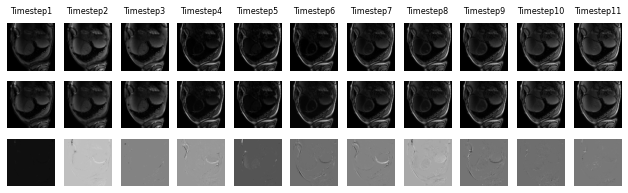

In [41]:
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from hyperspy.learn.rpca import rpca_godec, orpca
from scripts import utils
path = 'data/MOLLI_pre_dataset/test/0387056_20140423_MOLLI_3.npy'
vols = np.load(path).transpose(1, 2, 0)
vols = utils.normalize(vols)
x, y, z = vols.shape
print(f"x is {x} and y is {y} and z is {z}")
M = vols.reshape(x*y, z)
print(M.shape)
low, sparse, U, S, V = rpca_godec(M, rank=5)
low_matrix = low.reshape((x, y, z))
sparse_matrix = sparse.reshape((x, y, z))

fig = plt.figure(figsize=(11, 3))
title_font_size=8
title_pad = 10
for i in range(z):
    ax1 = fig.add_subplot(3, 11, 1+i)
    plt.imshow(vols[..., i], cmap='gray')
    plt.axis('off')
    ax1.set_title(f"Timestep{i+1}", fontsize=title_font_size, pad=title_pad)

    ax2 = fig.add_subplot(3, 11, 12+i)
    plt.imshow(low_matrix[..., i], cmap='gray')
    plt.axis('off')

    ax3 = fig.add_subplot(3, 11, 23+i)
    plt.imshow(sparse_matrix[..., i], cmap='gray')
    plt.axis('off')

x is 224 and y is 224 and z is 11
(50176, 11)


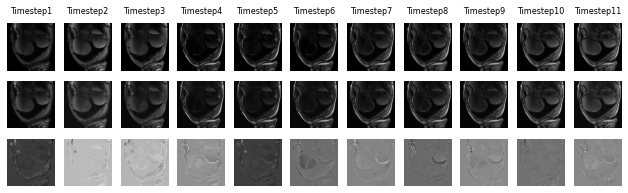

In [42]:
path = 'data/MOLLI_pre_dataset/test/0387056_20140423_MOLLI_3.npy'
vols = np.load(path).transpose(1, 2, 0)
x, y, z = vols.shape
print(f"x is {x} and y is {y} and z is {z}")
M = vols.reshape(x*y, z)
print(M.shape)
low, sparse, U, S, V = rpca_godec(M, rank=5)
low_matrix = low.reshape((x, y, z))
sparse_matrix = sparse.reshape((x, y, z))

fig = plt.figure(figsize=(11, 3))
title_font_size=8
title_pad = 10
for i in range(z):
    ax1 = fig.add_subplot(3, 11, 1+i)
    plt.imshow(vols[..., i], cmap='gray')
    plt.axis('off')
    ax1.set_title(f"Timestep{i+1}", fontsize=title_font_size, pad=title_pad)

    ax2 = fig.add_subplot(3, 11, 12+i)
    plt.imshow(low_matrix[..., i], cmap='gray')
    plt.axis('off')

    ax3 = fig.add_subplot(3, 11, 23+i)
    plt.imshow(sparse_matrix[..., i], cmap='gray')
    plt.axis('off')

In [2]:
import pandas as pd
df = pd.DataFrame()
df_2 = pd.DataFrame()

## Test Metrics

### Original volume

#### First Eigen Component percentage

In [3]:
from scripts.utils import *
orig_path = 'data/MOLLI_pre_dataset/test'
orig_pca_changes = []
for file in sorted(glob.glob(os.path.join(orig_path, '*.npy'))):
    vols = np.load(file).transpose(1, 2, 0)
    eig_org, org_K, org_dis = pca(vols, topk=1)
    orig_pca_changes.append(org_dis)
print(f"Mean of original PCA is {np.mean(np.array(orig_pca_changes))}")

Mean of original PCA is 0.7867720274668718


#### T1 fitting

In [4]:
import scipy.io
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_t1_changes(fig, path, subject_list, orig_t1err_square_list, orig_t1err_heart_list):
    for i, file in enumerate(sorted(glob.glob(os.path.join(path, '*.mat')))):
        subject = Path(file).stem
        subject_list.append(subject)
        fd = scipy.io.loadmat(file)
        SD_err = fd['S']
        areamask = fd['areamask']
        itemindex = np.where(areamask == 1)
        x1, x2 = itemindex[0][0], itemindex[0][-1]
        y1, y2 = itemindex[1][0], itemindex[1][-1]
        heartmask = fd['epi_BW']
        errmap = SD_err * areamask

        orig_t1err_square_list.append(np.mean(errmap[areamask==1]))
        fig.add_subplot(10, 4, 1+i*4)
        ax = plt.gca()
        im = ax.imshow(errmap[x1:x2, y1:y2], cmap='jet', vmin=0, vmax=50)
        ax.axis('off')
        ax.set_title(f"{subject}", fontsize=title_font_size, pad=title_pad)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)

        t1_params_pre = fd['pmap_mse']
        a = t1_params_pre[:, :, 0]
        b = t1_params_pre[:, :, 1]
        c = t1_params_pre[:, :, 2]
        t1map = c * (b - 1)
        fig.add_subplot(10, 4, 2+i*4)
        ax = plt.gca()
        im = ax.imshow(t1map[x1:x2, y1:y2], cmap='jet', vmin=0, vmax=2500)
        ax.axis('off')
        ax.set_title(f"{subject}", fontsize=title_font_size, pad=title_pad)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)

        hearterrmap = SD_err * heartmask
        heartt1map = t1map * heartmask
        orig_t1err_heart_list.append(np.mean(hearterrmap[heartmask==1]))

        fig.add_subplot(10, 4, 3+i*4)
        ax = plt.gca()
        im = ax.imshow(hearterrmap[x1:x2, y1:y2], cmap='jet', vmin=0, vmax=50)
        ax.axis('off')
        ax.set_title(f"{subject}", fontsize=title_font_size, pad=title_pad)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)

        fig.add_subplot(10, 4, 4+i*4)
        ax = plt.gca()
        im = ax.imshow(heartt1map[x1:x2, y1:y2], cmap='jet', vmin=0, vmax=2500)
        ax.axis('off')
        ax.set_title(f"{subject}", fontsize=title_font_size, pad=title_pad)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)
    plt.subplots_adjust(left=0.0001,right=0.9, top=0.95, bottom=0.1,)
    return fig, subject_list, orig_t1err_square_list, orig_t1err_heart_list

Mean of t1err is 11.072921129848977 and std is 4.963850319538608
Mean of t1err is 14.217012343355398 and std is 7.345939012337131


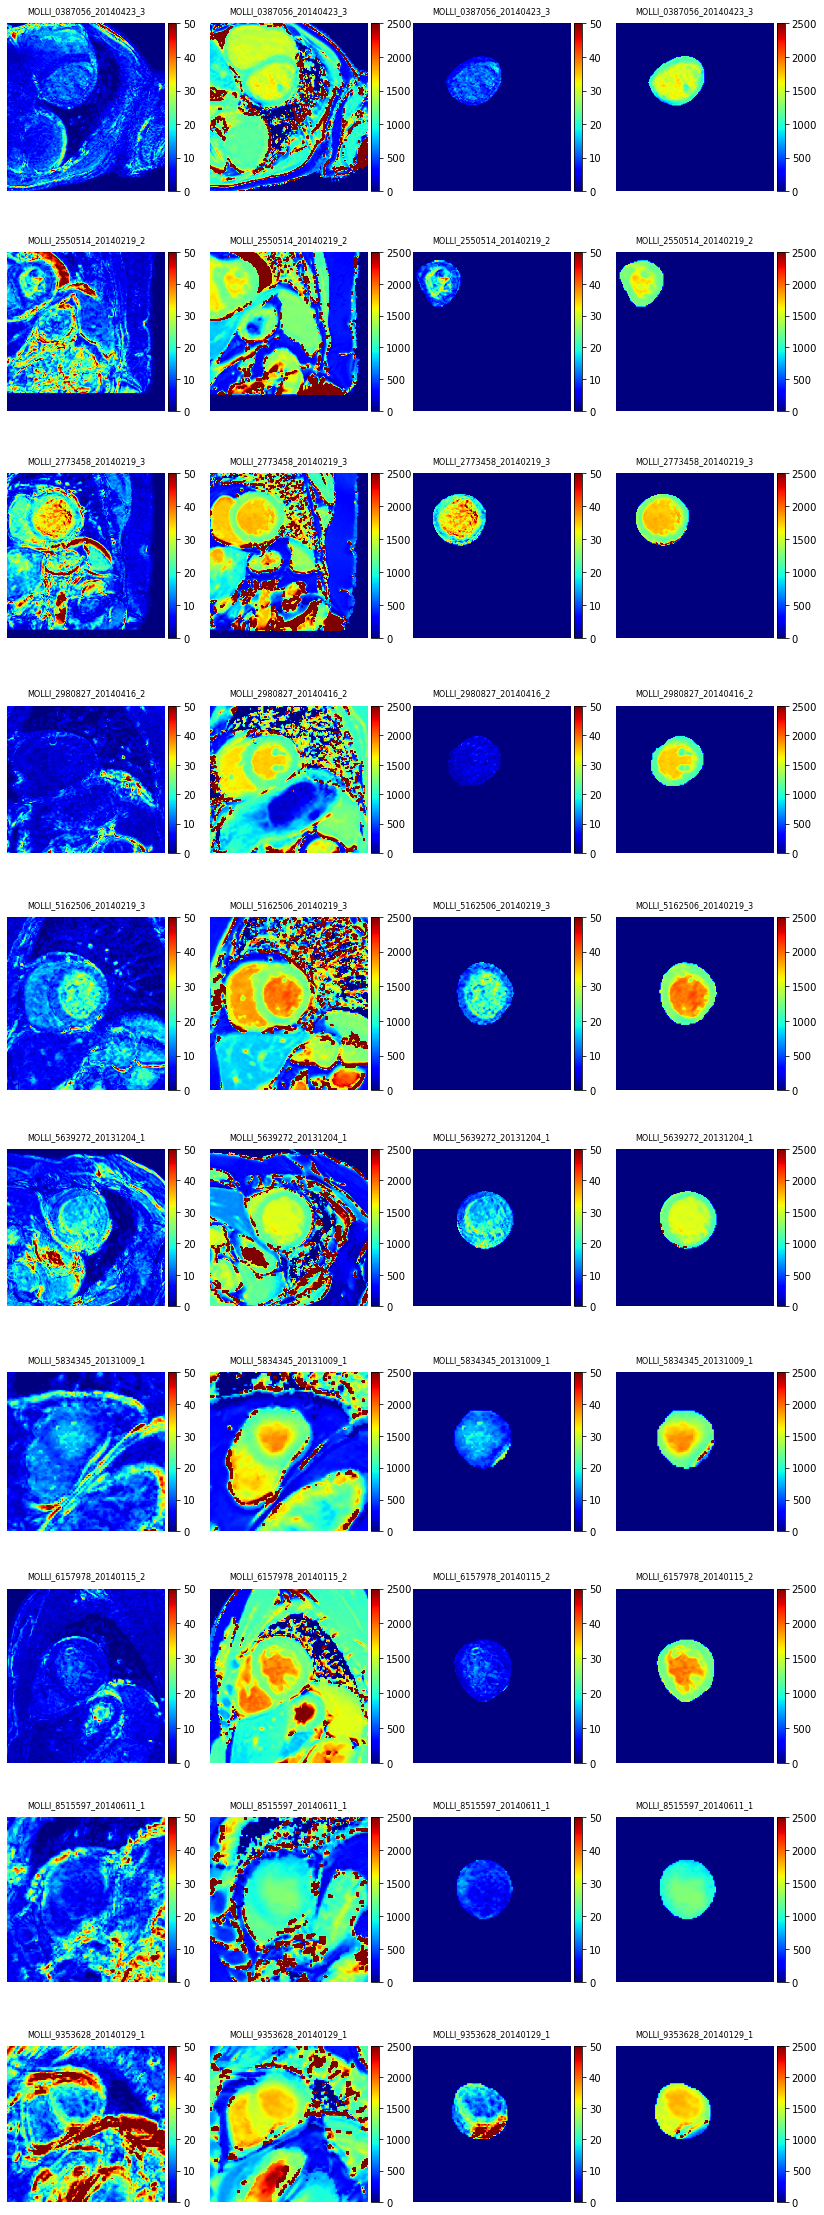

In [5]:
path = "data/MOLLI_pre_dataset/T1_SDerr"
# print(path)
fig = plt.figure(figsize=(12,36))
title_font_size=8
title_pad = 10
orig_t1err_square_list = []
orig_t1err_heart_list = []
subject_list = []

fig, subject_list, orig_t1err_square_list, orig_t1err_heart_list = plot_t1_changes(fig, path, subject_list, orig_t1err_square_list, orig_t1err_heart_list)

print(f"Mean of t1err is {np.mean(np.array(orig_t1err_square_list))} and std is {np.std(np.array(orig_t1err_square_list))}")
print(f"Mean of t1err is {np.mean(np.array(orig_t1err_heart_list))} and std is {np.std(np.array(orig_t1err_heart_list))}")
plt.savefig(f"data/MOLLI_pre_dataset/T1_SDerr/orig_t1err.png", dpi=300)

df['Cases'] = subject_list
df['Raw Square T1err'] = orig_t1err_square_list
df['Raw Heart T1err'] = orig_t1err_heart_list
df_2['Cases'] = subject_list
df_2['Raw PCA'] = orig_pca_changes

### Round 1

In [6]:
import voxelmorph_group as vxm  # nopep8
import numpy as np
import glob
import os
jacobian = vxm.losses.Jacobian().loss

In [7]:
r = 1
root = f"results/MOLLI_pre/group/rank_11_11_11_11_11_11_11/nmi/smooth/image_loss_weight1/cycle_loss_weight0.01/weight0.001/bspline/cps4_svfsteps7_svfscale1/e80/test_MOLLI_pre"
base_path = f"{root}/round{r}"

#### First Eigen Component percentage

In [8]:
path = f"{base_path}/moved"
pca_changes = []
for file in sorted(glob.glob(os.path.join(path, '*.npy'))):
    vols = np.load(file).transpose(1, 2, 0)
    eig_org, org_K, org_dis = pca(vols, topk=1)
    pca_changes.append(org_dis)
print(f"Mean of Round 1 PCA is {np.mean(np.array(pca_changes))} and std is {np.std(np.array(pca_changes))}")

Mean of Round 1 PCA is 0.7945269348595835 and std is 0.023796810049859975


#### Jacobian Determination

In [9]:
folding_ratio_list = []
mag_det_jac_det_list = []
path = f"{base_path}/warp"
for file in sorted(glob.glob(os.path.join(path, '*.nii'))):
    disp = vxm.py.utils.load_volfile(file).transpose(2, 3, 0, 1)
    folding_ratio, mag_det_jac_det = jacobian(disp)
    folding_ratio_list.append(folding_ratio)
    mag_det_jac_det_list.append(mag_det_jac_det)

print(f"Mean of folding ratio is {np.mean(np.array(folding_ratio_list))}")
print(f"Mean of mag det jac det is {np.mean(np.array(mag_det_jac_det_list))}")

Mean of folding ratio is 0.0
Mean of mag det jac det is 0.002411169931292534


#### T1 fitting

Mean of t1err is 8.526087649207351 and std is 4.515319699518546
Mean of t1err is 8.641273858627311 and std is 4.574122758268553


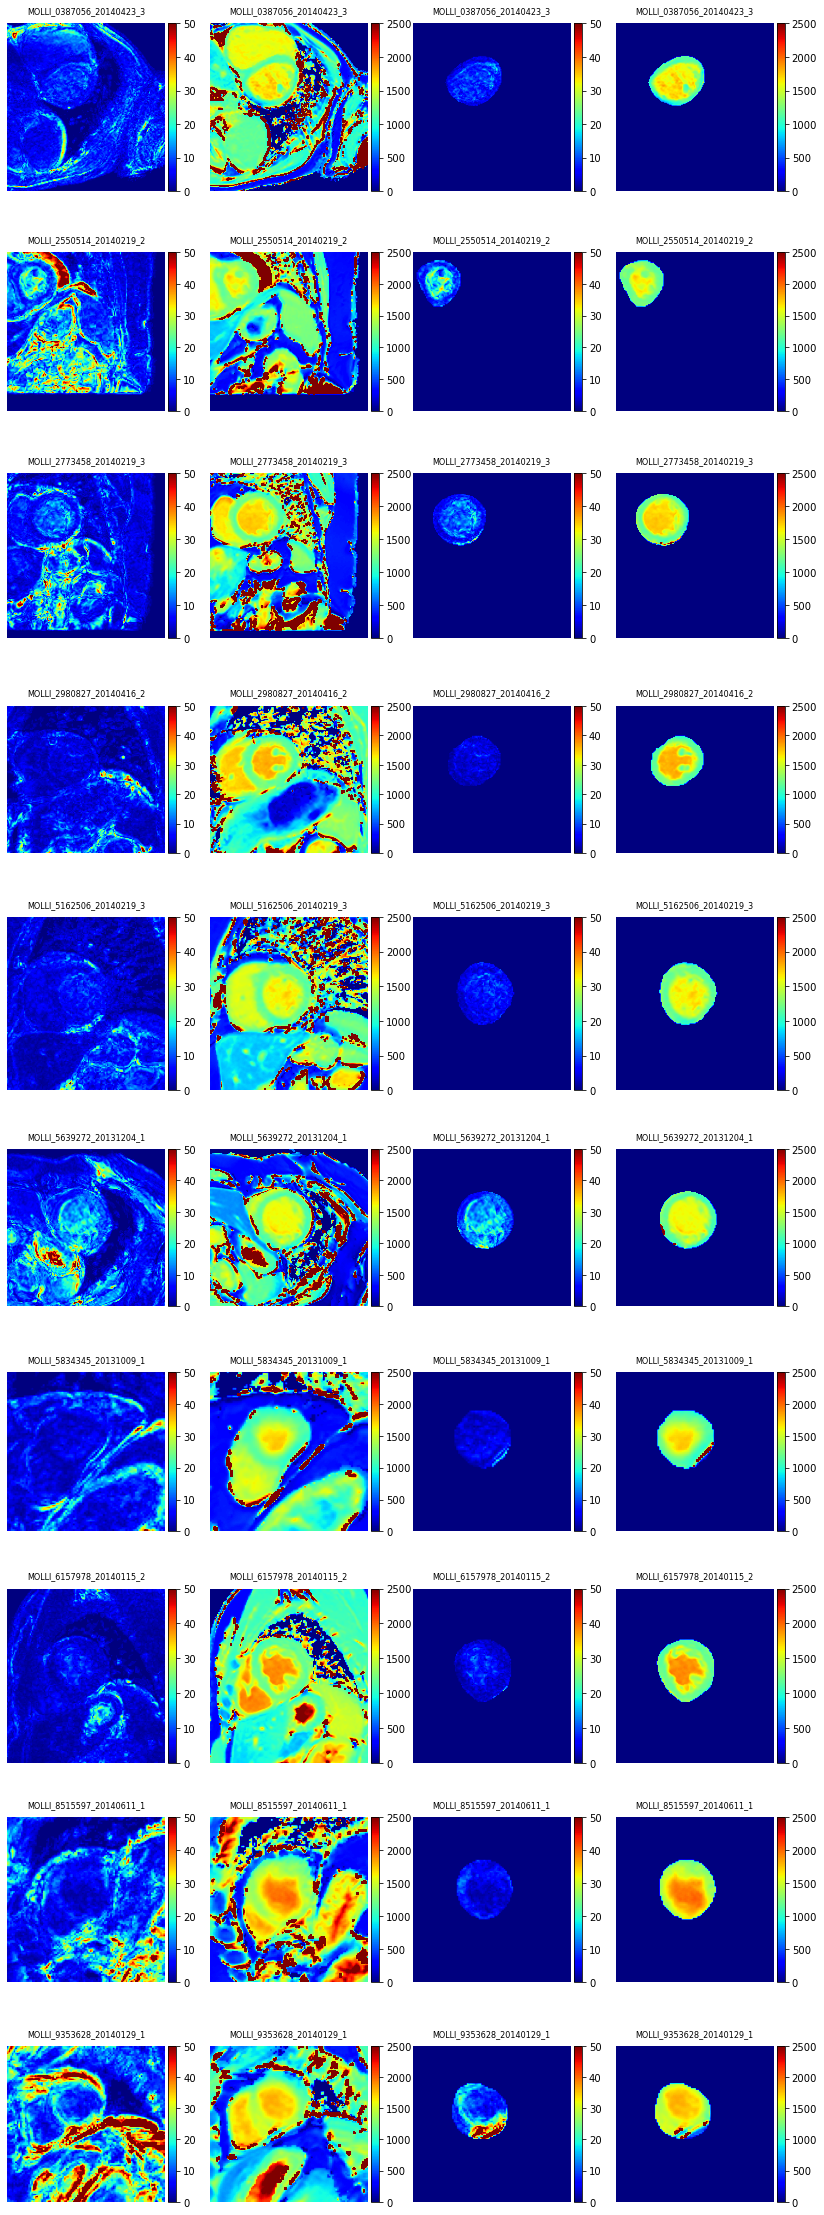

In [10]:
import matplotlib.pyplot as plt

path = f"{base_path}/t1_SDerr"
# print(path)
fig = plt.figure(figsize=(12, 36))
title_font_size=8
title_pad = 10
t1err_square_list = []
t1err_heart_list = []
subject_list = []

fig, subject_list, t1err_square_list, t1err_heart_list = plot_t1_changes(fig, path, subject_list, t1err_square_list, t1err_heart_list)

print(f"Mean of t1err is {np.mean(np.array(t1err_square_list))} and std is {np.std(np.array(t1err_square_list))}")
print(f"Mean of t1err is {np.mean(np.array(t1err_heart_list))} and std is {np.std(np.array(t1err_heart_list))}")
plt.savefig(f"{base_path}/t1_SDerr.png", dpi=300)

df['R1 Square T1err'] = t1err_square_list
df['R1 Heart T1err'] = t1err_heart_list
df_2['R1 PCA'] = pca_changes
df_2['R1 Det'] = mag_det_jac_det_list
df_2['R1 Fold ratio'] = folding_ratio_list

### Round 2

In [11]:
r = 2
base_path = f"{root}/round{r}"

#### First Eigen Component percentage

In [12]:
path = f"{base_path}/moved"
pca_changes = []
for file in sorted(glob.glob(os.path.join(path, '*.npy'))):
    vols = np.load(file).transpose(1, 2, 0)
    eig_org, org_K, org_dis = pca(vols, topk=1)
    pca_changes.append(org_dis)
print(f"Mean of Round 2 PCA is {np.mean(np.array(pca_changes))} and std is {np.std(np.array(pca_changes))}")

Mean of Round 2 PCA is 0.7974846588556661 and std is 0.02328141291832458


#### Jacobian Determination

In [13]:
folding_ratio_list = []
mag_det_jac_det_list = []
path = f"{base_path}/warp"
for file in sorted(glob.glob(os.path.join(path, '*.nii'))):
    disp = vxm.py.utils.load_volfile(file).transpose(2, 3, 0, 1)
    folding_ratio, mag_det_jac_det = jacobian(disp)
    folding_ratio_list.append(folding_ratio)
    mag_det_jac_det_list.append(mag_det_jac_det)

print(f"Mean of folding ratio is {np.mean(np.array(folding_ratio_list))}")
print(f"Mean of mag det jac det is {np.mean(np.array(mag_det_jac_det_list))}")

Mean of folding ratio is 0.0
Mean of mag det jac det is 0.0018409646581858397


#### T1 fitting

Mean of t1err is 9.663302151104062 and std is 4.2756442779200725
Mean of t1err is 13.453694358028491 and std is 6.908025207719416


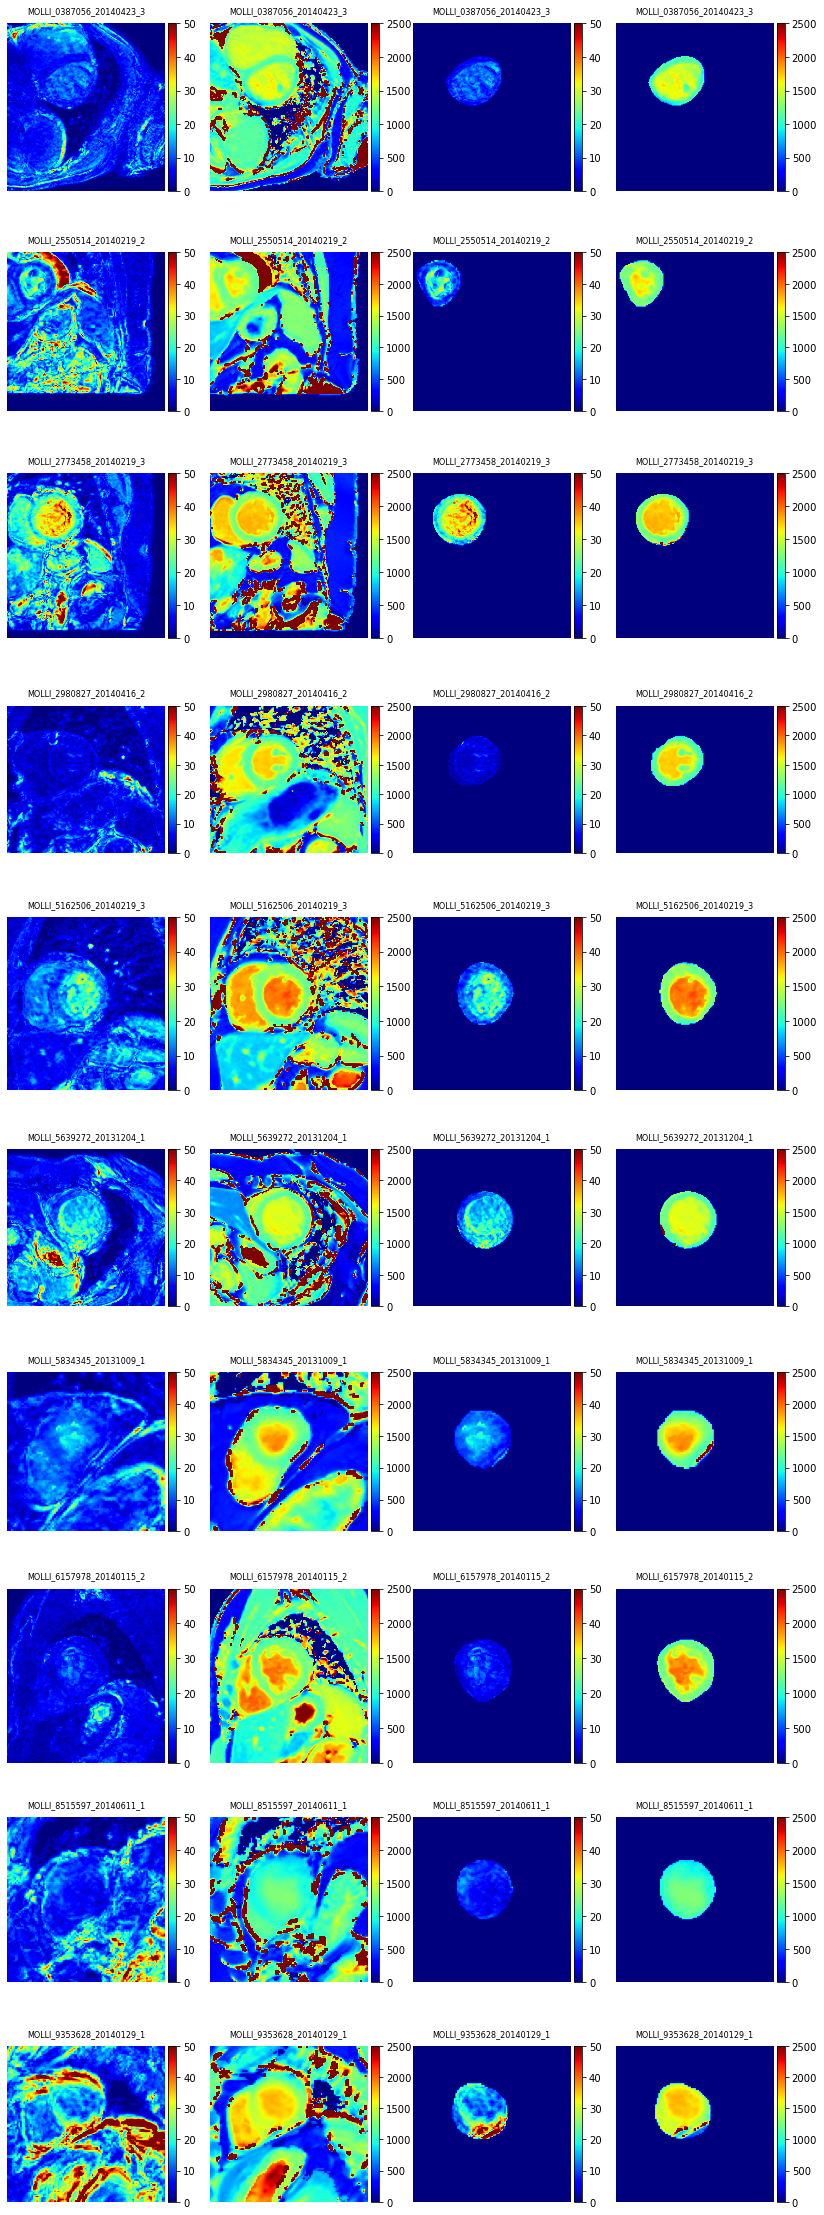

In [14]:
import matplotlib.pyplot as plt

path = f"{base_path}/t1_SDerr"
# print(path)
fig = plt.figure(figsize=(12, 36))
title_font_size=8
title_pad = 10
t1err_square_list = []
t1err_heart_list = []
subject_list = []

fig, subject_list, t1err_square_list, t1err_heart_list = plot_t1_changes(fig, path, subject_list, t1err_square_list, t1err_heart_list)

print(f"Mean of t1err is {np.mean(np.array(t1err_square_list))} and std is {np.std(np.array(t1err_square_list))}")
print(f"Mean of t1err is {np.mean(np.array(t1err_heart_list))} and std is {np.std(np.array(t1err_heart_list))}")
plt.savefig(f"{base_path}/t1_SDerr.png", dpi=300)

df['R2 Square T1err'] = t1err_square_list
df['R2 Heart T1err'] = t1err_heart_list
df_2['R2 PCA'] = pca_changes
df_2['R2 Det'] = mag_det_jac_det_list
df_2['R2 Fold ratio'] = folding_ratio_list

### Round 3

In [15]:
r = 3
base_path = f"{root}/round{r}"

#### First Eigen Component percentage

In [16]:
path = f"{base_path}/moved"
r5_pca_changes = []
for file in sorted(glob.glob(os.path.join(path, '*.npy'))):
    vols = np.load(file).transpose(1, 2, 0)
    eig_org, org_K, org_dis = pca(vols, topk=1)
    r5_pca_changes.append(org_dis)
print(f"Mean of Round 2 PCA is {np.mean(np.array(r5_pca_changes))} and std is {np.std(np.array(r5_pca_changes))}")

Mean of Round 2 PCA is 0.7995386102086094 and std is 0.022813922336988167


#### Jacobian Determination

In [17]:
r5_folding_ratio_list = []
r5_mag_det_jac_det_list = []
path = f"{base_path}/warp"
for file in sorted(glob.glob(os.path.join(path, '*.nii'))):
    disp = vxm.py.utils.load_volfile(file).transpose(2, 3, 0, 1)
    folding_ratio, mag_det_jac_det = jacobian(disp)
    r5_folding_ratio_list.append(folding_ratio)
    r5_mag_det_jac_det_list.append(mag_det_jac_det)

print(f"Mean of folding ratio is {np.mean(np.array(r5_folding_ratio_list))}")
print(f"Mean of mag det jac det is {np.mean(np.array(r5_mag_det_jac_det_list))}")

Mean of folding ratio is 0.0
Mean of mag det jac det is 0.0015761295799165964


#### T1 fitting

Mean of t1err is 9.356713360959722 and std is 4.04174658635928
Mean of t1err is 13.208739361722428 and std is 6.810832670739985


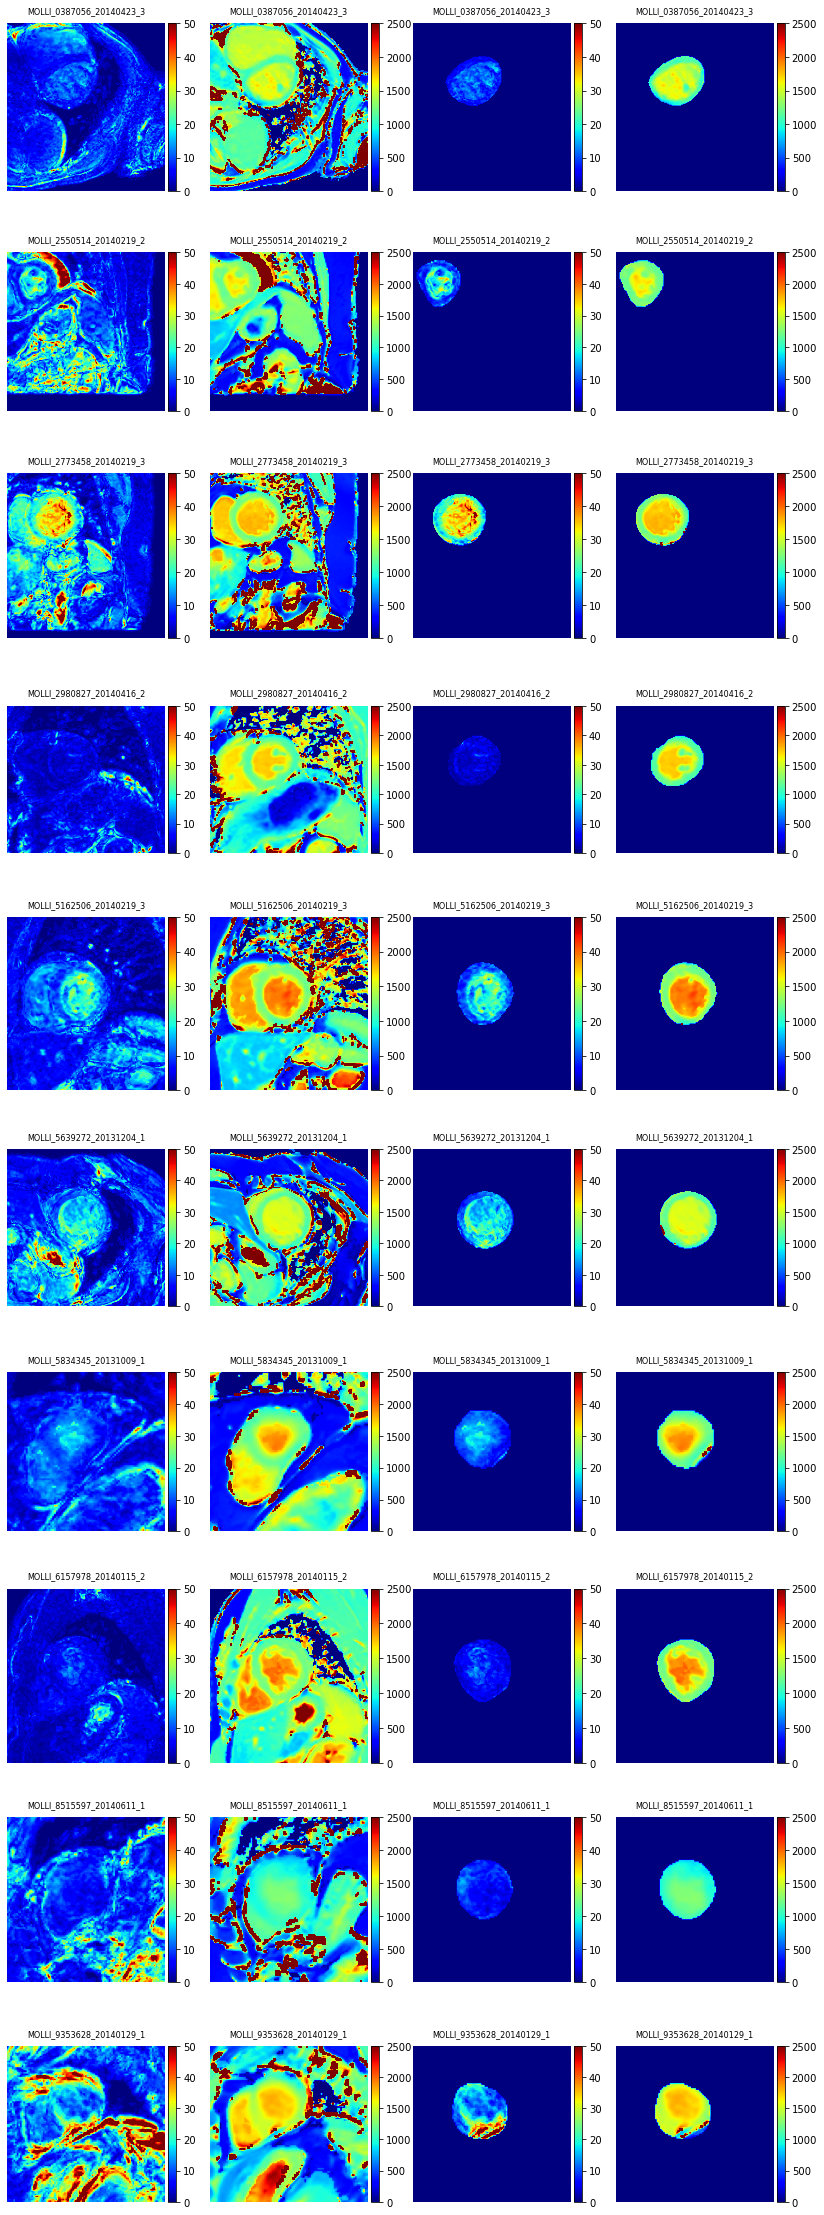

In [18]:
import matplotlib.pyplot as plt

path = f"{base_path}/t1_SDerr"
# print(path)
fig = plt.figure(figsize=(12, 36))
title_font_size=8
title_pad = 10
t1err_square_list = []
t1err_heart_list = []
subject_list = []

fig, subject_list, t1err_square_list, t1err_heart_list = plot_t1_changes(fig, path, subject_list, t1err_square_list, t1err_heart_list)

print(f"Mean of t1err is {np.mean(np.array(t1err_square_list))} and std is {np.std(np.array(t1err_square_list))}")
print(f"Mean of t1err is {np.mean(np.array(t1err_heart_list))} and std is {np.std(np.array(t1err_heart_list))}")
plt.savefig(f"{base_path}/t1_SDerr.png", dpi=300)

df['R3 Square T1err'] = t1err_square_list
df['R3 Heart T1err'] = t1err_heart_list
df_2['R3 PCA'] = pca_changes
df_2['R3 Det'] = mag_det_jac_det_list
df_2['R3 Fold ratio'] = folding_ratio_list

### Round 4

In [19]:
r = 4
base_path = f"{root}/round{r}"

#### First Eigen Component percentage

In [20]:
path = f"{base_path}/moved"
pca_changes = []
for file in sorted(glob.glob(os.path.join(path, '*.npy'))):
    vols = np.load(file).transpose(1, 2, 0)
    eig_org, org_K, org_dis = pca(vols, topk=1)
    pca_changes.append(org_dis)
print(f"Mean of Round 2 PCA is {np.mean(np.array(pca_changes))} and std is {np.std(np.array(pca_changes))}")

Mean of Round 2 PCA is 0.800854053884733 and std is 0.022641651657996014


#### Jacobian Determination

In [21]:
folding_ratio_list = []
mag_det_jac_det_list = []
path = f"{base_path}/warp"
for file in sorted(glob.glob(os.path.join(path, '*.nii'))):
    disp = vxm.py.utils.load_volfile(file).transpose(2, 3, 0, 1)
    folding_ratio, mag_det_jac_det = jacobian(disp)
    folding_ratio_list.append(folding_ratio)
    mag_det_jac_det_list.append(mag_det_jac_det)

print(f"Mean of folding ratio is {np.mean(np.array(folding_ratio_list))}")
print(f"Mean of mag det jac det is {np.mean(np.array(mag_det_jac_det_list))}")

Mean of folding ratio is 0.0
Mean of mag det jac det is 0.0012792578199878335


#### T1 fitting

Mean of t1err is 9.186753204265312 and std is 3.923673169517762
Mean of t1err is 13.135172619026912 and std is 6.786808405402316


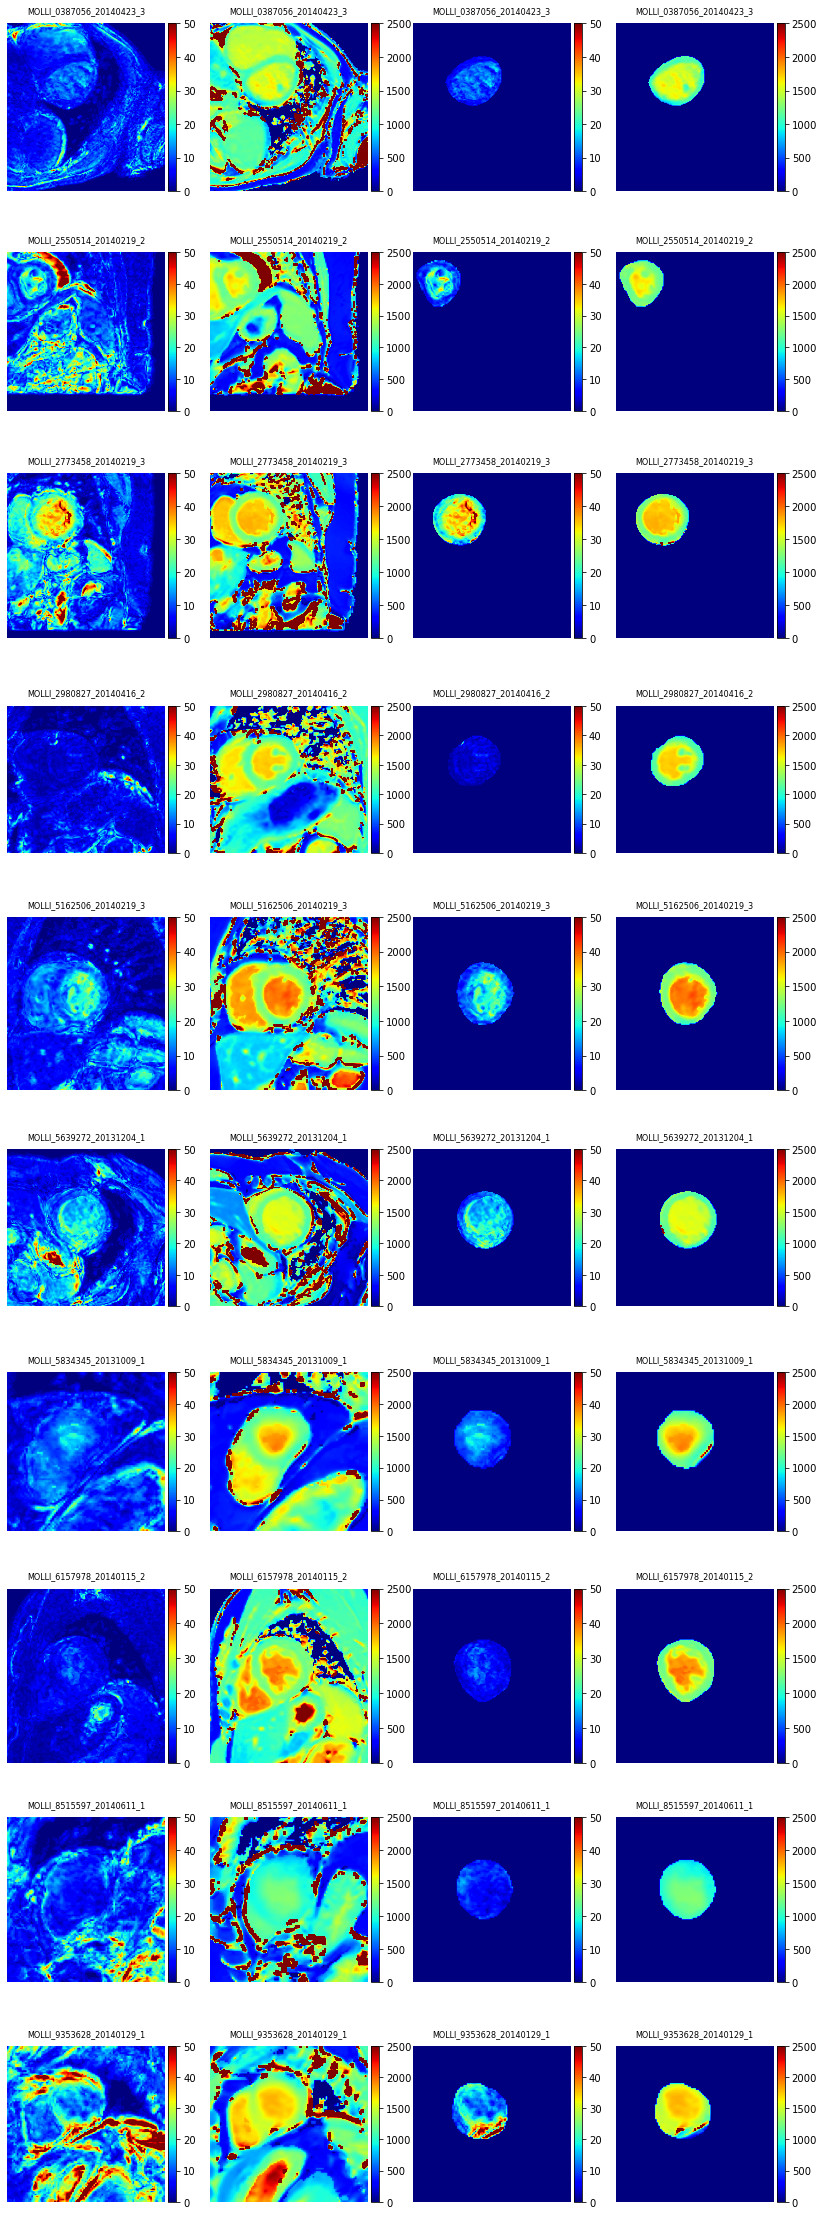

In [22]:
import matplotlib.pyplot as plt

path = f"{base_path}/t1_SDerr"
# print(path)
fig = plt.figure(figsize=(12, 36))
title_font_size=8
title_pad = 10
t1err_square_list = []
t1err_heart_list = []
subject_list = []

fig, subject_list, t1err_square_list, t1err_heart_list = plot_t1_changes(fig, path, subject_list, t1err_square_list, t1err_heart_list)

print(f"Mean of t1err is {np.mean(np.array(t1err_square_list))} and std is {np.std(np.array(t1err_square_list))}")
print(f"Mean of t1err is {np.mean(np.array(t1err_heart_list))} and std is {np.std(np.array(t1err_heart_list))}")
plt.savefig(f"{base_path}/t1_SDerr.png", dpi=300)

df['R4 Square T1err'] = t1err_square_list
df['R4 Heart T1err'] = t1err_heart_list
df_2['R4 PCA'] = pca_changes
df_2['R4 Det'] = mag_det_jac_det_list
df_2['R4 Fold ratio'] = folding_ratio_list

### Round 5

In [23]:
r = 5
base_path = f"{root}/round{r}"

#### First Eigen Component percentage

In [24]:
path = f"{base_path}/moved"
pca_changes = []
for file in sorted(glob.glob(os.path.join(path, '*.npy'))):
    vols = np.load(file).transpose(1, 2, 0)
    eig_org, org_K, org_dis = pca(vols, topk=1)
    pca_changes.append(org_dis)
print(f"Mean of Round 2 PCA is {np.mean(np.array(pca_changes))} and std is {np.std(np.array(pca_changes))}")

Mean of Round 2 PCA is 0.8017795390409412 and std is 0.022449688185613152


#### Jacobian Determination

In [25]:
folding_ratio_list = []
mag_det_jac_det_list = []
path = f"{base_path}/warp"
for file in sorted(glob.glob(os.path.join(path, '*.nii'))):
    disp = vxm.py.utils.load_volfile(file).transpose(2, 3, 0, 1)
    folding_ratio, mag_det_jac_det = jacobian(disp)
    folding_ratio_list.append(folding_ratio)
    mag_det_jac_det_list.append(mag_det_jac_det)

print(f"Mean of folding ratio is {np.mean(np.array(folding_ratio_list))}")
print(f"Mean of mag det jac det is {np.mean(np.array(mag_det_jac_det_list))}")

Mean of folding ratio is 0.0
Mean of mag det jac det is 0.0010257388930767775


#### T1 fitting

Mean of t1err is 9.079531611498897 and std is 3.84831797104974
Mean of t1err is 12.97981735866935 and std is 6.774855022031432


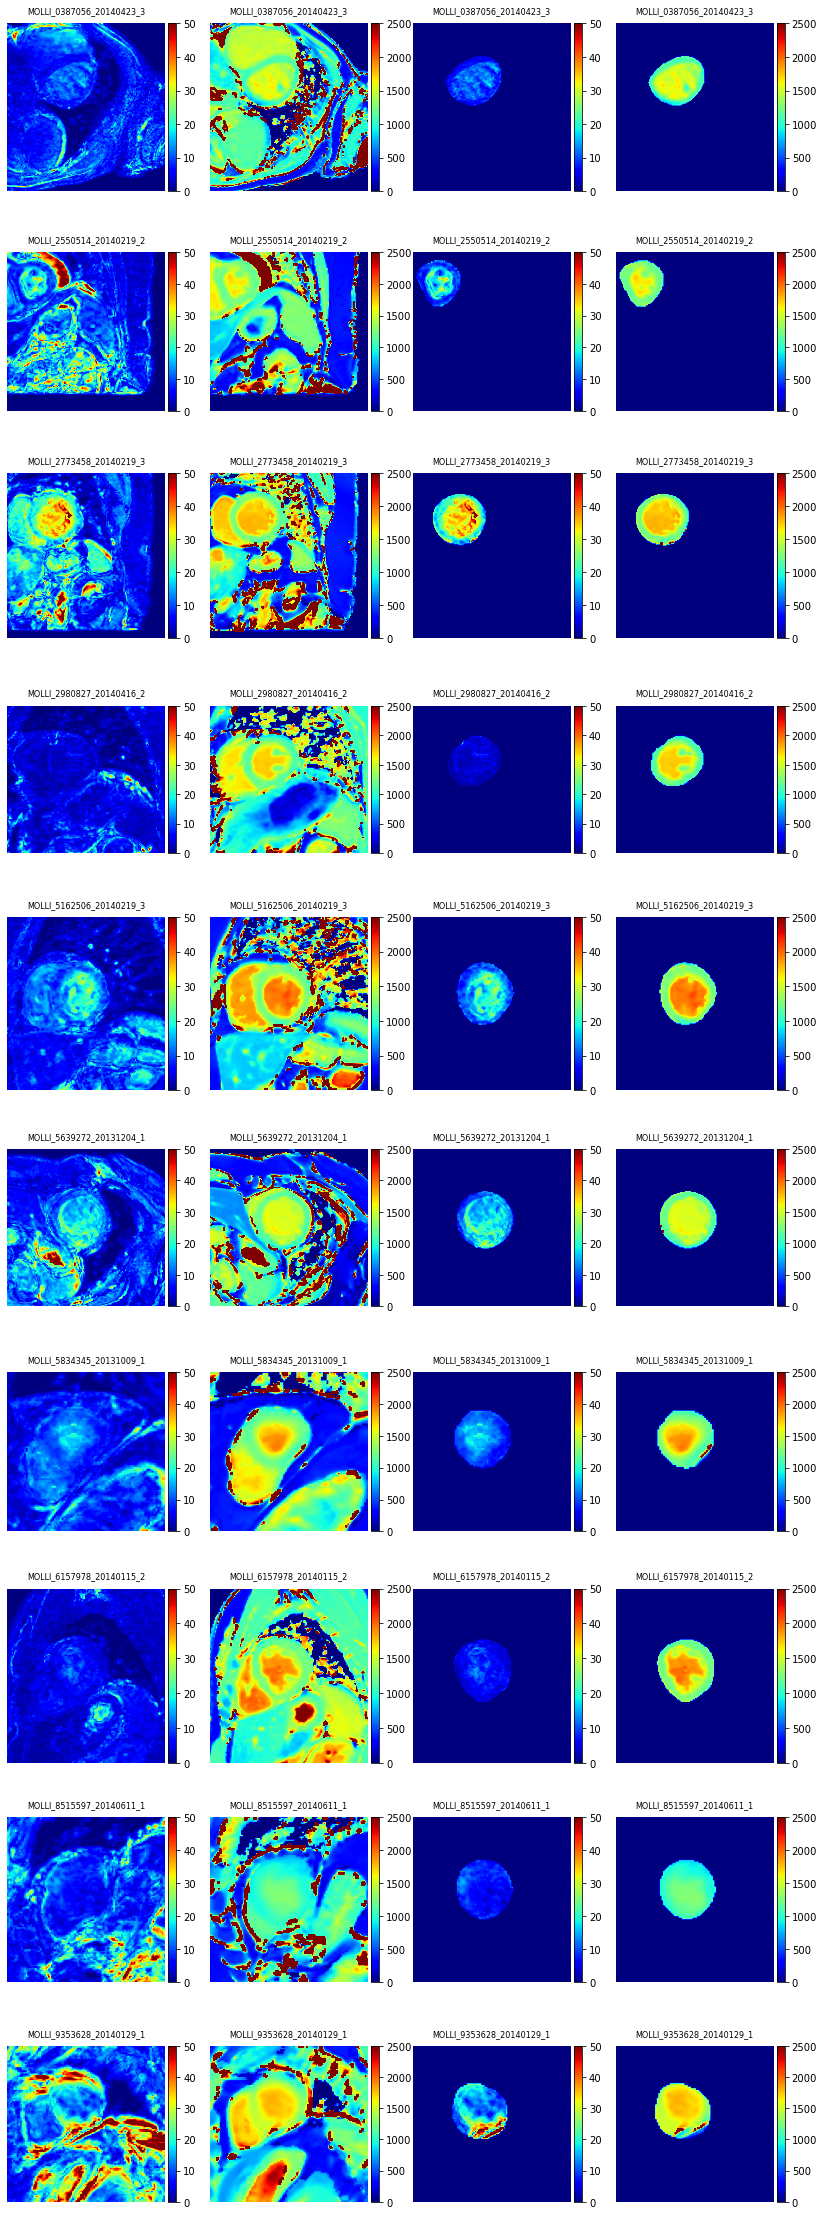

In [26]:
import matplotlib.pyplot as plt

path = f"{base_path}/t1_SDerr"
# print(path)
fig = plt.figure(figsize=(12, 36))
title_font_size=8
title_pad = 10
t1err_square_list = []
t1err_heart_list = []
subject_list = []

fig, subject_list, t1err_square_list, t1err_heart_list = plot_t1_changes(fig, path, subject_list, t1err_square_list, t1err_heart_list)

print(f"Mean of t1err is {np.mean(np.array(t1err_square_list))} and std is {np.std(np.array(t1err_square_list))}")
print(f"Mean of t1err is {np.mean(np.array(t1err_heart_list))} and std is {np.std(np.array(t1err_heart_list))}")
plt.savefig(f"{base_path}/t1_SDerr.png", dpi=300)

df['R5 Square T1err'] = t1err_square_list
df['R5 Heart T1err'] = t1err_heart_list
df_2['R5 PCA'] = pca_changes
df_2['R5 Det'] = mag_det_jac_det_list
df_2['R5 Fold ratio'] = folding_ratio_list

### Round 6

In [27]:
r = 6
base_path = f"{root}/round{r}"

#### First Eigen Component percentage

In [28]:
path = f"{base_path}/moved"
pca_changes = []
for file in sorted(glob.glob(os.path.join(path, '*.npy'))):
    vols = np.load(file).transpose(1, 2, 0)
    eig_org, org_K, org_dis = pca(vols, topk=1)
    pca_changes.append(org_dis)
print(f"Mean of Round 2 PCA is {np.mean(np.array(pca_changes))} and std is {np.std(np.array(pca_changes))}")

Mean of Round 2 PCA is 0.8026860405079846 and std is 0.022457516602215254


#### Jacobian Determination

In [29]:
folding_ratio_list = []
mag_det_jac_det_list = []
path = f"{base_path}/warp"
for file in sorted(glob.glob(os.path.join(path, '*.nii'))):
    disp = vxm.py.utils.load_volfile(file).transpose(2, 3, 0, 1)
    folding_ratio, mag_det_jac_det = jacobian(disp)
    folding_ratio_list.append(folding_ratio)
    mag_det_jac_det_list.append(mag_det_jac_det)

print(f"Mean of folding ratio is {np.mean(np.array(folding_ratio_list))}")
print(f"Mean of mag det jac det is {np.mean(np.array(mag_det_jac_det_list))}")

Mean of folding ratio is 0.0
Mean of mag det jac det is 0.0010973223252221942


#### T1 fitting

Mean of t1err is 9.00060268865413 and std is 3.7718983470563074
Mean of t1err is 12.903065236721966 and std is 6.728897839219172


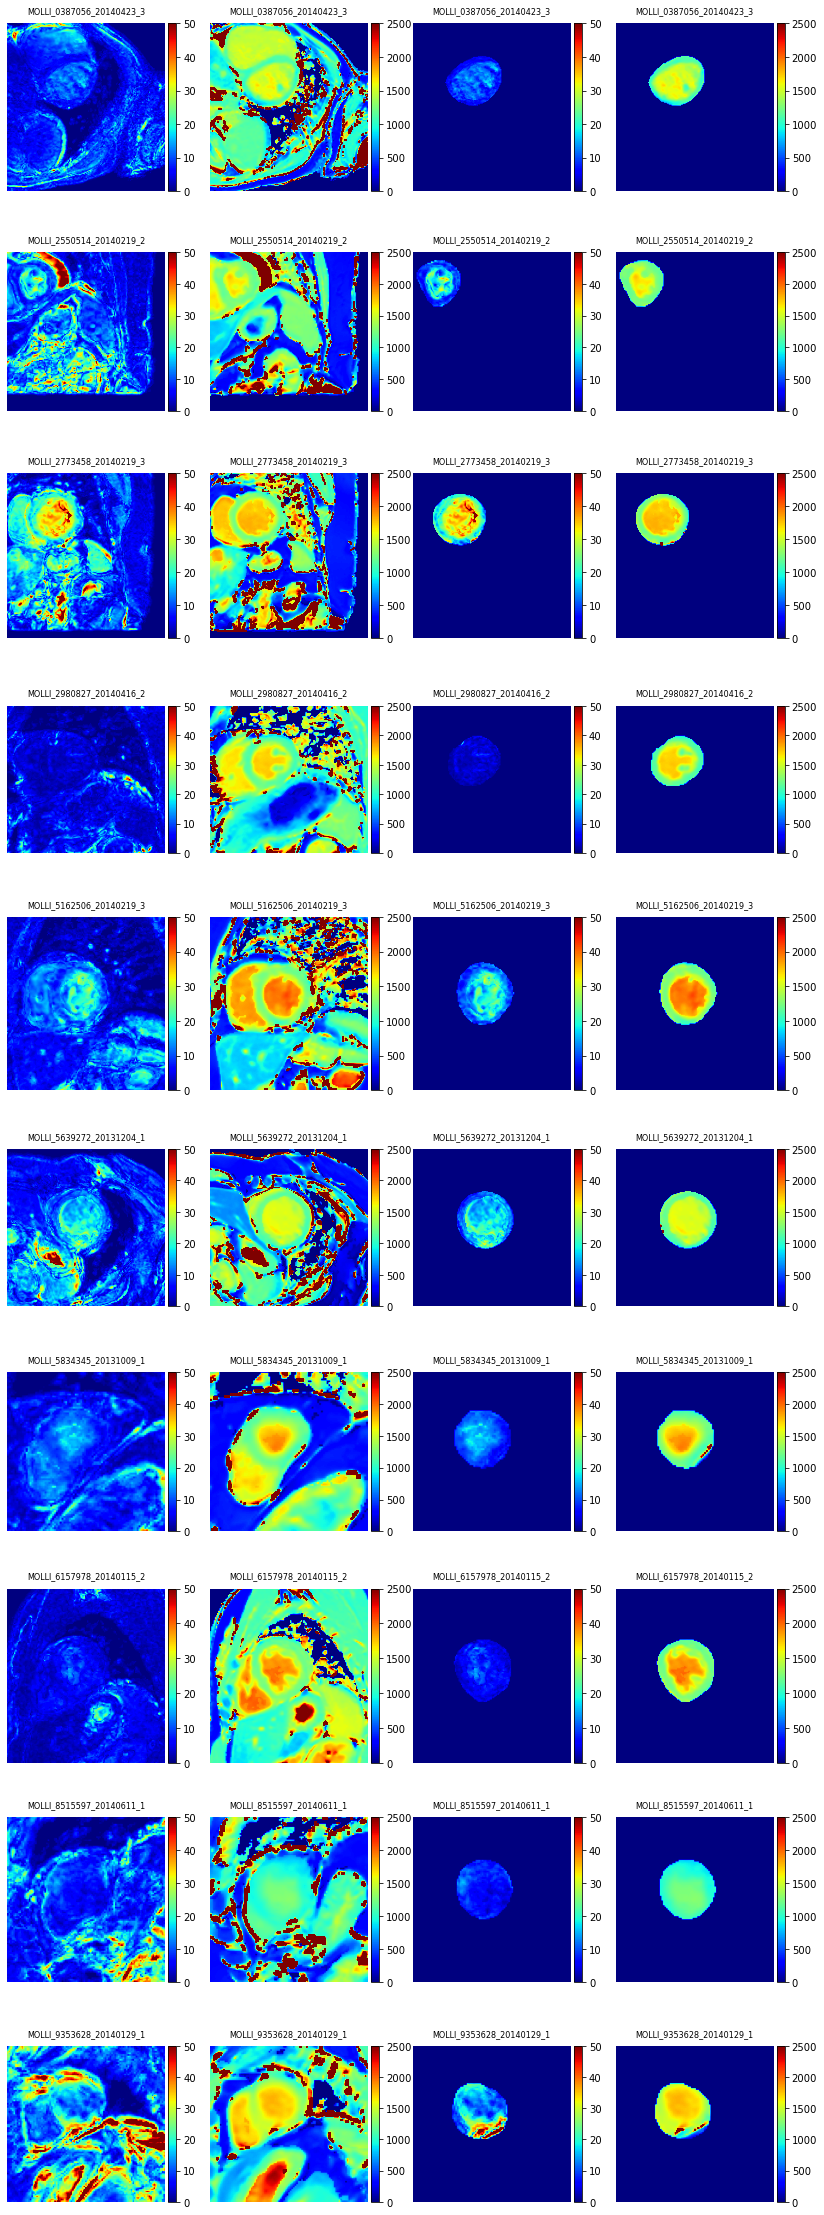

In [30]:
import matplotlib.pyplot as plt

path = f"{base_path}/t1_SDerr"
# print(path)
fig = plt.figure(figsize=(12, 36))
title_font_size=8
title_pad = 10
t1err_square_list = []
t1err_heart_list = []
subject_list = []

fig, subject_list, t1err_square_list, t1err_heart_list = plot_t1_changes(fig, path, subject_list, t1err_square_list, t1err_heart_list)

print(f"Mean of t1err is {np.mean(np.array(t1err_square_list))} and std is {np.std(np.array(t1err_square_list))}")
print(f"Mean of t1err is {np.mean(np.array(t1err_heart_list))} and std is {np.std(np.array(t1err_heart_list))}")
plt.savefig(f"{base_path}/t1_SDerr.png", dpi=300)

df['R6 Square T1err'] = t1err_square_list
df['R6 Heart T1err'] = t1err_heart_list
df_2['R6 PCA'] = pca_changes
df_2['R6 Det'] = mag_det_jac_det_list
df_2['R6 Fold ratio'] = folding_ratio_list

### Round 7

In [31]:
r = 7
base_path = f"{root}/round{r}"

#### First Eigen Component percentage

In [32]:
path = f"{base_path}/moved"
pca_changes = []
for file in sorted(glob.glob(os.path.join(path, '*.npy'))):
    vols = np.load(file).transpose(1, 2, 0)
    eig_org, org_K, org_dis = pca(vols, topk=1)
    pca_changes.append(org_dis)
print(f"Mean of Round 2 PCA is {np.mean(np.array(pca_changes))} and std is {np.std(np.array(pca_changes))}")

Mean of Round 2 PCA is 0.8032876122912176 and std is 0.022389058682776918


#### Jacobian Determination

In [33]:
folding_ratio_list = []
mag_det_jac_det_list = []
path = f"{base_path}/warp"
for file in sorted(glob.glob(os.path.join(path, '*.nii'))):
    disp = vxm.py.utils.load_volfile(file).transpose(2, 3, 0, 1)
    folding_ratio, mag_det_jac_det = jacobian(disp)
    folding_ratio_list.append(folding_ratio)
    mag_det_jac_det_list.append(mag_det_jac_det)

print(f"Mean of folding ratio is {np.mean(np.array(folding_ratio_list))}")
print(f"Mean of mag det jac det is {np.mean(np.array(mag_det_jac_det_list))}")

Mean of folding ratio is 0.0
Mean of mag det jac det is 0.0008238949812948704


#### T1 fitting

Mean of t1err is 8.92795865634173 and std is 3.7185738135789745
Mean of t1err is 12.809510909899657 and std is 6.621781767319066


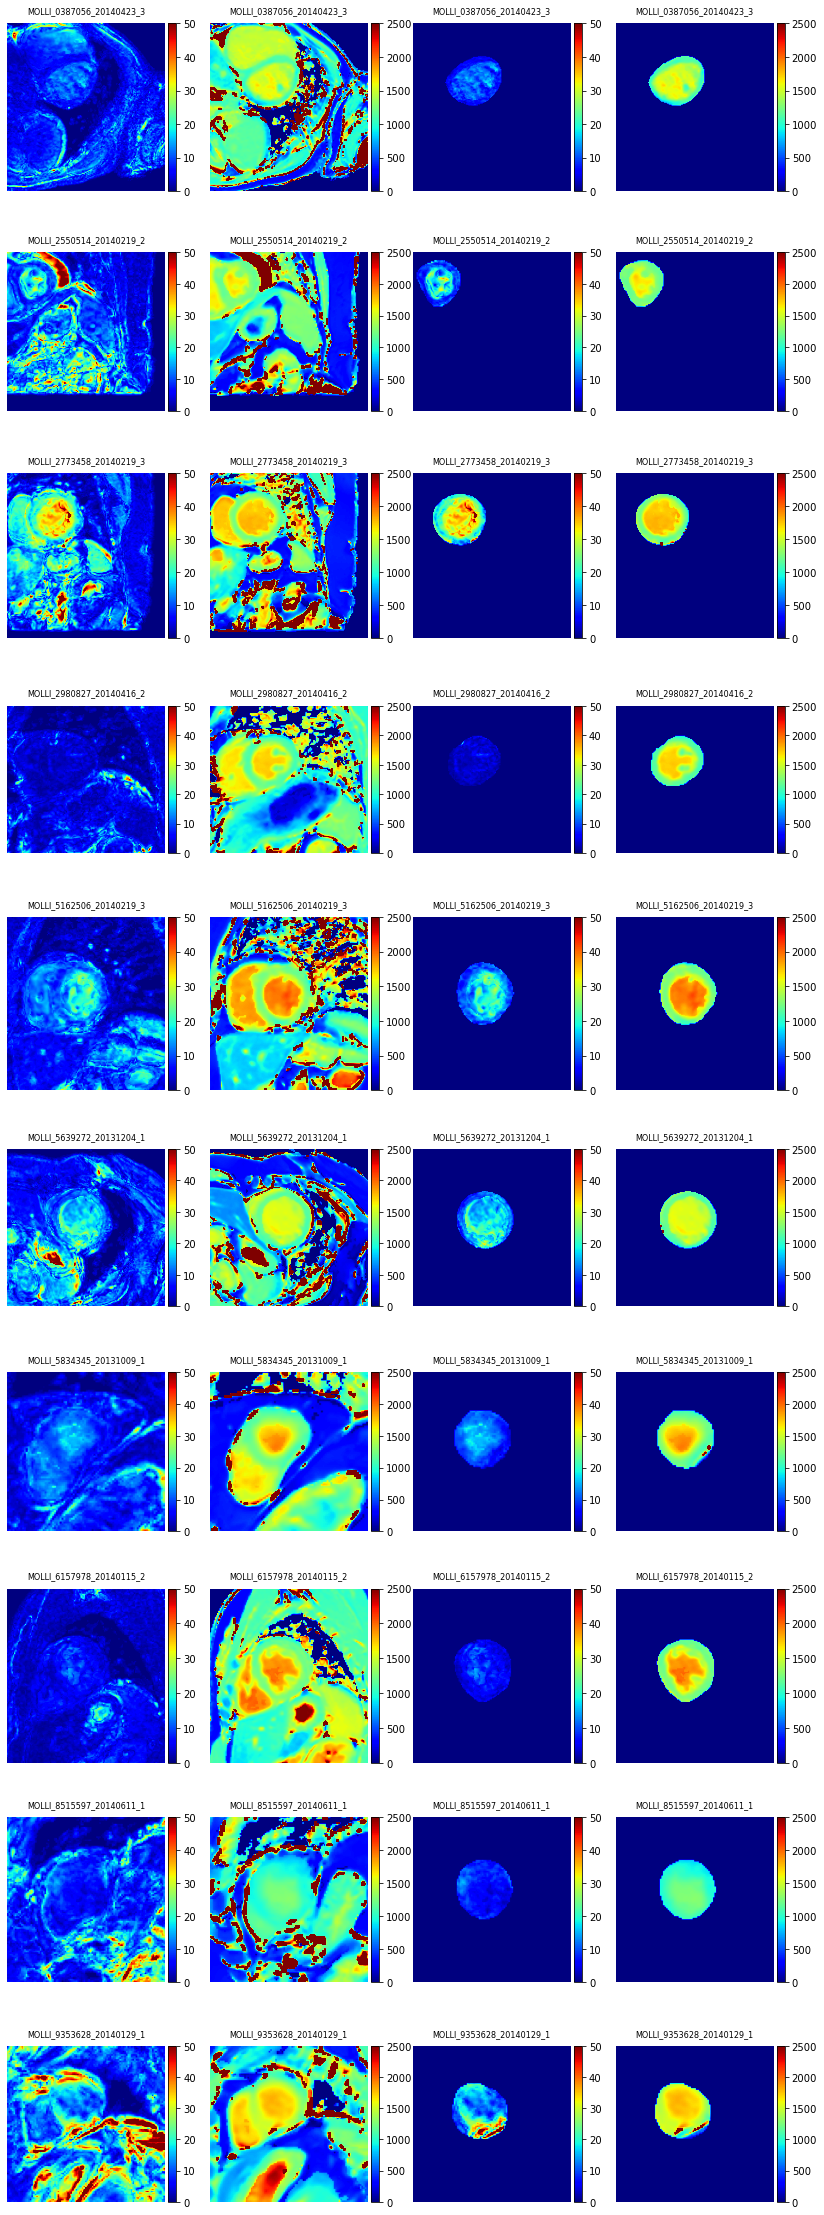

In [34]:
import matplotlib.pyplot as plt

path = f"{base_path}/t1_SDerr"
# print(path)
fig = plt.figure(figsize=(12, 36))
title_font_size=8
title_pad = 10
t1err_square_list = []
t1err_heart_list = []
subject_list = []

fig, subject_list, t1err_square_list, t1err_heart_list = plot_t1_changes(fig, path, subject_list, t1err_square_list, t1err_heart_list)

print(f"Mean of t1err is {np.mean(np.array(t1err_square_list))} and std is {np.std(np.array(t1err_square_list))}")
print(f"Mean of t1err is {np.mean(np.array(t1err_heart_list))} and std is {np.std(np.array(t1err_heart_list))}")
plt.savefig(f"{base_path}/t1_SDerr.png", dpi=300)

df['R7 Square T1err'] = t1err_square_list
df['R7 Heart T1err'] = t1err_heart_list
df_2['R7 PCA'] = pca_changes
df_2['R7 Det'] = mag_det_jac_det_list
df_2['R7 Fold ratio'] = folding_ratio_list

### Summary

In [35]:
df

Cases  Raw Square T1err  Raw Heart T1err  \
0  MOLLI_0387056_20140423_3          7.539072         9.731935   
1  MOLLI_2550514_20140219_2         12.360840        14.576425   
2  MOLLI_2773458_20140219_3         13.635501        28.671655   
3  MOLLI_2980827_20140416_2          5.785524         3.958349   
4  MOLLI_5162506_20140219_3          8.644283        17.141349   
5  MOLLI_5639272_20131204_1         11.297461        17.010539   
6  MOLLI_5834345_20131009_1         10.555566        12.637421   
7  MOLLI_6157978_20140115_2          5.011841         6.933013   
8  MOLLI_8515597_20140611_1         12.463286         7.736930   
9  MOLLI_9353628_20140129_1         23.435838        23.772507   

   R1 Square T1err  R1 Heart T1err  R2 Square T1err  R2 Heart T1err  \
0         6.436069        7.673758         6.999589        9.497827   
1        11.486214       13.527195        11.219330       13.768274   
2         7.494098        9.540920        11.885662       27.801310   
3         5.072614        3.836829         4.912926        3.791604   
4         4.867166        5.984507         7.729642       16.170458   
5         9.134562       13.489229        10.027851       16.494235   
6         6.429881        4.483147         8.200914       11.801339   
7         3.841084        4.809522         4.500765        6.519975   
8        10.389206        5.159704        10.932953        7.518608   
9        20.109982       17.907927        20.223391       21.173314   

   R3 Square T1err  R3 Heart T1err  R4 Square T1err  R4 Heart T1err  \
0         6.887209        9.322281         6.822629        9.610654   
1        10.950649       13.807078        10.719611       13.749233   
2        11.645498       27.821554        11.520226       27.849336   
3         4.766162        3.706127         4.624899        3.560288   
4         7.605315       15.755078         7.526159       15.485570   
5         9.770360       16.328915         9.641852       16.027357   
6         7.833139       11.524804         7.705994       11.532958   
7         4.429335        6.406690         4.406696        6.415389   
8        10.455641        7.432180        10.186309        7.329503   
9        19.223825       19.982687        18.713157       19.791439   

   R5 Square T1err  R5 Heart T1err  R6 Square T1err  R6 Heart T1err  \
0         6.817578        9.411938         6.763750        9.496892   
1        10.567981       13.521805        10.488748       13.577018   
2        11.487996       27.728991        11.500738       27.682819   
3         4.561467        3.401199         4.518352        3.378000   
4         7.479449       15.375941         7.421304       15.144739   
5         9.583916       16.131548         9.539799       15.997459   
6         7.584505       11.387862         7.505396       11.196691   
7         4.324222        6.224498         4.335000        6.213995   
8        10.036602        7.281534         9.928852        7.291190   
9        18.351601       19.332858        18.004090       19.051849   

   R7 Square T1err  R7 Heart T1err  
0         6.709149        9.440651  
1        10.407654       13.530548  
2        11.409017       27.410091  
3         4.471359        3.311078  
4         7.415374       15.042997  
5         9.516580       15.985515  
6         7.415859       11.206963  
7         4.330470        6.346917  
8         9.828596        7.262846  
9        17.775528       18.557504

In [36]:
df.describe()

Raw Square T1err  Raw Heart T1err  R1 Square T1err  R1 Heart T1err  \
count         10.000000        10.000000        10.000000       10.000000   
mean          11.072921        14.217012         8.526088        8.641274   
std            5.232358         7.743300         4.759565        4.821549   
min            5.011841         3.958349         3.841084        3.836829   
25%            7.815375         8.235682         5.411931        4.897067   
50%           10.926513        13.606923         6.965083        6.829133   
75%           12.437674        17.108646        10.075545       12.502152   
max           23.435838        28.671655        20.109982       17.907927   

       R2 Square T1err  R2 Heart T1err  R3 Square T1err  R3 Heart T1err  \
count        10.000000       10.000000        10.000000       10.000000   
mean          9.663302       13.453694         9.356713       13.208739   
std           4.506925        7.281698         4.260375        7.179248   
min           4.500765        3.791604         4.429335        3.706127   
25%           7.182102        8.013413         7.066735        7.904705   
50%           9.114382       12.784806         8.801750       12.665941   
75%          11.147736       16.413290        10.826897       16.185456   
max          20.223391       27.801310        19.223825       27.821554   

       R4 Square T1err  R4 Heart T1err  R5 Square T1err  R5 Heart T1err  \
count        10.000000       10.000000        10.000000       10.000000   
mean          9.186753       13.135173         9.079532       12.979817   
std           4.135915        7.153924         4.056483        7.141324   
min           4.406696        3.560288         4.324222        3.401199   
25%           6.998512        7.899791         6.983046        7.814135   
50%           8.673923       12.641096         8.584210       12.454834   
75%          10.586285       15.891910        10.435136       15.942646   
max          18.713157       27.849336        18.351601       27.728991   

       R6 Square T1err  R6 Heart T1err  R7 Square T1err  R7 Heart T1err  
count        10.000000       10.000000        10.000000       10.000000  
mean          9.000603       12.903065         8.927959       12.809511  
std           3.975930        7.092881         3.919721        6.979971  
min           4.335000        3.378000         4.330470        3.311078  
25%           6.928138        7.842616         6.885705        7.807297  
50%           8.522597       12.386854         8.466220       12.368755  
75%          10.348774       15.784279        10.262890       15.749886  
max          18.004090       27.682819        17.775528       27.410091

In [37]:

df['R1/Raw Heart %'] = (df['Raw Heart T1err'] - df['R1 Heart T1err']) / df['Raw Heart T1err']
df['R2/Raw Heart %'] = (df['Raw Heart T1err'] - df['R2 Heart T1err']) / df['Raw Heart T1err']
df['R3/Raw Heart %'] = (df['Raw Heart T1err'] - df['R3 Heart T1err']) / df['Raw Heart T1err']
df['R4/Raw Heart %'] = (df['Raw Heart T1err'] - df['R4 Heart T1err']) / df['Raw Heart T1err']
df['R5/Raw Heart %'] = (df['Raw Heart T1err'] - df['R5 Heart T1err']) / df['Raw Heart T1err']
df['R6/Raw Heart %'] = (df['Raw Heart T1err'] - df['R6 Heart T1err']) / df['Raw Heart T1err']
df['R7/Raw Heart %'] = (df['Raw Heart T1err'] - df['R7 Heart T1err']) / df['Raw Heart T1err']
df.describe()

Raw Square T1err  Raw Heart T1err  R1 Square T1err  R1 Heart T1err  \
count         10.000000        10.000000        10.000000       10.000000   
mean          11.072921        14.217012         8.526088        8.641274   
std            5.232358         7.743300         4.759565        4.821549   
min            5.011841         3.958349         3.841084        3.836829   
25%            7.815375         8.235682         5.411931        4.897067   
50%           10.926513        13.606923         6.965083        6.829133   
75%           12.437674        17.108646        10.075545       12.502152   
max           23.435838        28.671655        20.109982       17.907927   

       R2 Square T1err  R2 Heart T1err  R3 Square T1err  R3 Heart T1err  \
count        10.000000       10.000000        10.000000       10.000000   
mean          9.663302       13.453694         9.356713       13.208739   
std           4.506925        7.281698         4.260375        7.179248   
min           4.500765        3.791604         4.429335        3.706127   
25%           7.182102        8.013413         7.066735        7.904705   
50%           9.114382       12.784806         8.801750       12.665941   
75%          11.147736       16.413290        10.826897       16.185456   
max          20.223391       27.801310        19.223825       27.821554   

       R4 Square T1err  R4 Heart T1err  ...  R7 Square T1err  R7 Heart T1err  \
count        10.000000       10.000000  ...        10.000000       10.000000   
mean          9.186753       13.135173  ...         8.927959       12.809511   
std           4.135915        7.153924  ...         3.919721        6.979971   
min           4.406696        3.560288  ...         4.330470        3.311078   
25%           6.998512        7.899791  ...         6.885705        7.807297   
50%           8.673923       12.641096  ...         8.466220       12.368755   
75%          10.586285       15.891910  ...        10.262890       15.749886   
max          18.713157       27.849336  ...        17.775528       27.410091   

       R7/Raw Square %  R7/Raw Heart %  R1/Raw Heart %  R2/Raw Heart %  \
count        10.000000       10.000000       10.000000       10.000000   
mean          0.184465        0.097025        0.337062        0.050226   
std           0.057842        0.058722        0.237676        0.025665   
min           0.110083        0.029931        0.030700        0.024056   
25%           0.146032        0.060512        0.208127        0.030353   
50%           0.160650        0.078144        0.276491        0.048784   
75%           0.223209        0.120109        0.567213        0.058842   
max           0.297446        0.219371        0.667235        0.109336   

       R3/Raw Heart %  R4/Raw Heart %  R5/Raw Heart %  R6/Raw Heart %  
count       10.000000       10.000000       10.000000       10.000000  
mean         0.067195        0.073503        0.088022        0.092376  
std          0.037964        0.043443        0.048956        0.054012  
min          0.029650        0.012462        0.032878        0.024152  
25%          0.040576        0.053682        0.053470        0.058098  
50%          0.058250        0.066230        0.085614        0.086136  
75%          0.079634        0.094296        0.102792        0.115861  
max          0.159420        0.167465        0.186756        0.198576  

[8 rows x 24 columns]

In [38]:
df_2

Cases   Raw PCA    R1 PCA    R1 Det  R1 Fold ratio  \
0  MOLLI_0387056_20140423_3  0.806249  0.813025  0.001794            0.0   
1  MOLLI_2550514_20140219_2  0.792254  0.799022  0.002572            0.0   
2  MOLLI_2773458_20140219_3  0.773361  0.781303  0.002412            0.0   
3  MOLLI_2980827_20140416_2  0.813012  0.818972  0.002377            0.0   
4  MOLLI_5162506_20140219_3  0.787799  0.793483  0.002429            0.0   
5  MOLLI_5639272_20131204_1  0.773060  0.779336  0.002156            0.0   
6  MOLLI_5834345_20131009_1  0.757565  0.769132  0.002862            0.0   
7  MOLLI_6157978_20140115_2  0.839774  0.845426  0.002231            0.0   
8  MOLLI_8515597_20140611_1  0.770515  0.780373  0.002680            0.0   
9  MOLLI_9353628_20140129_1  0.754133  0.765195  0.002599            0.0   

     R2 PCA    R2 Det  R2 Fold ratio    R3 PCA    R3 Det  ...  R4 Fold ratio  \
0  0.816311  0.001663            0.0  0.816311  0.001663  ...            0.0   
1  0.801750  0.001742            0.0  0.801750  0.001742  ...            0.0   
2  0.783455  0.001868            0.0  0.783455  0.001868  ...            0.0   
3  0.821099  0.001718            0.0  0.821099  0.001718  ...            0.0   
4  0.795366  0.001819            0.0  0.795366  0.001819  ...            0.0   
5  0.781280  0.001919            0.0  0.781280  0.001919  ...            0.0   
6  0.773900  0.002041            0.0  0.773900  0.002041  ...            0.0   
7  0.847611  0.001693            0.0  0.847611  0.001693  ...            0.0   
8  0.784817  0.002106            0.0  0.784817  0.002106  ...            0.0   
9  0.769258  0.001843            0.0  0.769258  0.001843  ...            0.0   

     R5 PCA    R5 Det  R5 Fold ratio    R6 PCA    R6 Det  R6 Fold ratio  \
0  0.820477  0.000878            0.0  0.821501  0.000937            0.0   
1  0.805807  0.000994            0.0  0.806574  0.001105            0.0   
2  0.787045  0.001050            0.0  0.787771  0.001088            0.0   
3  0.824113  0.001014            0.0  0.824660  0.001093            0.0   
4  0.798407  0.001104            0.0  0.798819  0.001080            0.0   
5  0.784643  0.001044            0.0  0.785186  0.001070            0.0   
6  0.780428  0.001078            0.0  0.781774  0.001185            0.0   
7  0.850672  0.000970            0.0  0.852001  0.001060            0.0   
8  0.790486  0.001100            0.0  0.791410  0.001196            0.0   
9  0.775719  0.001025            0.0  0.777165  0.001161            0.0   

     R7 PCA    R7 Det  R7 Fold ratio  
0  0.822153  0.000696            0.0  
1  0.807042  0.000832            0.0  
2  0.788067  0.000855            0.0  
3  0.825268  0.000786            0.0  
4  0.799382  0.000863            0.0  
5  0.785455  0.000828            0.0  
6  0.782702  0.000894            0.0  
7  0.852451  0.000767            0.0  
8  0.792173  0.000880            0.0  
9  0.778183  0.000839            0.0  

[10 rows x 23 columns]

In [39]:
df2 = df_2.drop(['R1 Fold ratio', 'R2 Fold ratio', 'R3 Fold ratio', 'R4 Fold ratio', 'R5 Fold ratio', 'R6 Fold ratio', 'R7 Fold ratio'], axis=1)
df2['R1/Raw PCA %'] = (df2['R1 PCA'] - df2['Raw PCA']) / df2['Raw PCA']
df2['R2/Raw PCA %'] = (df2['R2 PCA'] - df2['Raw PCA']) / df2['Raw PCA']
df2['R3/Raw PCA %'] = (df2['R3 PCA'] - df2['Raw PCA']) / df2['Raw PCA']
df2['R4/Raw PCA %'] = (df2['R4 PCA'] - df2['Raw PCA']) / df2['Raw PCA']
df2['R5/Raw PCA %'] = (df2['R5 PCA'] - df2['Raw PCA']) / df2['Raw PCA']
df2['R6/Raw PCA %'] = (df2['R6 PCA'] - df2['Raw PCA']) / df2['Raw PCA']
df2['R7/Raw PCA %'] = (df2['R7 PCA'] - df2['Raw PCA']) / df2['Raw PCA']
df2.describe()

Raw PCA     R1 PCA     R1 Det     R2 PCA     R2 Det     R3 PCA  \
count  10.000000  10.000000  10.000000  10.000000  10.000000  10.000000   
mean    0.786772   0.794527   0.002411   0.797485   0.001841   0.797485   
std     0.026789   0.025084   0.000301   0.024541   0.000148   0.024541   
min     0.754133   0.765195   0.001794   0.769258   0.001663   0.769258   
25%     0.771151   0.779596   0.002268   0.781824   0.001724   0.781824   
50%     0.780580   0.787393   0.002420   0.790091   0.001831   0.790091   
75%     0.802750   0.809524   0.002592   0.812670   0.001906   0.812670   
max     0.839774   0.845426   0.002862   0.847611   0.002106   0.847611   

          R3 Det     R4 PCA     R4 Det     R5 PCA  ...     R6 Det     R7 PCA  \
count  10.000000  10.000000  10.000000  10.000000  ...  10.000000  10.000000   
mean    0.001841   0.800854   0.001279   0.801780  ...   0.001097   0.803288   
std     0.000148   0.023866   0.000088   0.023664  ...   0.000074   0.023600   
min     0.001663   0.774562   0.001070   0.775719  ...   0.000937   0.778183   
25%     0.001724   0.784330   0.001260   0.785243  ...   0.001072   0.786108   
50%     0.001831   0.793347   0.001288   0.794446  ...   0.001090   0.795778   
75%     0.001906   0.816076   0.001311   0.816809  ...   0.001147   0.818375   
max     0.002106   0.850013   0.001409   0.850672  ...   0.001196   0.852451   

          R7 Det  R1/Raw PCA %  R2/Raw PCA %  R3/Raw PCA %  R4/Raw PCA %  \
count  10.000000     10.000000     10.000000     10.000000     10.000000   
mean    0.000824      0.009935      0.013722      0.013722      0.018039   
std     0.000060      0.003183      0.004595      0.004595      0.006189   
min     0.000696      0.006730      0.009333      0.009333      0.012192   
25%     0.000796      0.007528      0.010119      0.010119      0.013085   
50%     0.000835      0.008474      0.012233      0.012233      0.016460   
75%     0.000861      0.012163      0.017184      0.017184      0.022426   
max     0.000894      0.015269      0.021563      0.021563      0.028239   

       R5/Raw PCA %  R6/Raw PCA %  R7/Raw PCA %  
count     10.000000     10.000000     10.000000  
mean       0.019225      0.020380      0.021150  
std        0.006529      0.006885      0.007169  
min        0.012978      0.013989      0.014704  
25%        0.013987      0.014842      0.015330  
50%        0.017377      0.018354      0.018841  
75%        0.023862      0.025068      0.026013  
max        0.030180      0.031957      0.033182  

[8 rows x 22 columns]

In [40]:
df_det = df_2[['R1 Det', 'R2 Det', 'R3 Det', 'R4 Det', 'R5 Det', 'R6 Det', 'R7 Det']]
df_det.describe()

R1 Det     R2 Det     R3 Det     R4 Det     R5 Det     R6 Det  \
count  10.000000  10.000000  10.000000  10.000000  10.000000  10.000000   
mean    0.002411   0.001841   0.001841   0.001279   0.001026   0.001097   
std     0.000301   0.000148   0.000148   0.000088   0.000068   0.000074   
min     0.001794   0.001663   0.001663   0.001070   0.000878   0.000937   
25%     0.002268   0.001724   0.001724   0.001260   0.000999   0.001072   
50%     0.002420   0.001831   0.001831   0.001288   0.001035   0.001090   
75%     0.002592   0.001906   0.001906   0.001311   0.001071   0.001147   
max     0.002862   0.002106   0.002106   0.001409   0.001104   0.001196   

          R7 Det  
count  10.000000  
mean    0.000824  
std     0.000060  
min     0.000696  
25%     0.000796  
50%     0.000835  
75%     0.000861  
max     0.000894